# Analysis of Data Elements from the RADx-rad Project

Data Elements for the RADx-rad project are divided into 3 tiers:
* Tier1: Minimum Common Data Elements (patient demographics and medical history).
* Tier2: Harmonized Data Elements developed for diagnostic method development projects.
* Tier3: Non-harmonized Data Elements.

Author: Peter W Rose, UC San Diego (pwrose.ucsd@gmail.com)

Data last updated: 2025-06-09

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
# Set pandas to display all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
# Ensure plots display inline
%matplotlib inline

In [3]:
# Results directory
result_dir = "../../results"

In [4]:
df = pd.read_csv(os.path.join(result_dir, "data_elements.csv"), dtype=str)
df = df[["Id", "subproject", "phs_id", "project_num", "radx_id", "tier"]].copy()
df.drop_duplicates(inplace=True)
# simplify phs ids
df["phs_id"] = df["phs_id"].str.replace(".v1.p1", "")

## Assign demographic data element into a single category

In [5]:
tier1 = pd.read_csv("https://raw.githubusercontent.com/radxrad/common-data-elements/refs/heads/main/cdes/RADx-rad_tier1_dict_2025-06-24.csv", dtype=str, keep_default_na=False)

In [6]:
# Group demographic variables
demographics = {"Identity": "Demographics",
                "Race": "Demographics",
                "Ethnicity": "Demographics",
                "Sex": "Demographics",
                "Age": "Demographics",
                "Education": "Demographics",
                "Domicile": "Demographics",
                "Employment": "Demographics",
                "Insurance Status": "Demographics",
               }

tier1["Section"] = tier1["Section"].map(lambda x: demographics.get(x, x))
tier1

,Id,Label,Examples,Section,Cardinality,Terms,Datatype,Unit,Enumeration,Notes,MissingValueCodes,Provenance,SeeAlso
0,study_id,RADx-rad Study ID; Subject ID; Datavent ID,,Demographics,single,NCIT:C164337,string,,,,"""-9960""=[Not Entered By Originator]",RADx-rad Minimum CDE,
1,race,What is your race? Mark one or more boxes.,,Demographics,single,GSSO:002199,integer,,"""1""=[American Indian or Alaska Native] | ""2""=[Asian] | ""3""=[Black or African American] | ""4""=[Native Hawaiian or Other Pacific Islander] | ""5""=[White] | ""6""=[Some other race]",,"""-9960""=[Not Entered By Originator]",RADx-rad Minimum CDE,
2,ethnicity,Are you of Hispanic or Latino origin?,,Demographics,single,NCIT:C16564,integer,,"""1""=[Yes, of Hispanic or Latino origin] | ""0""=[No, not of Hispanic or Latino origin]",,"""-9960""=[Not Entered By Originator]",RADx-rad Minimum CDE,
3,age,What is your age?,,Demographics,single,PATO:0000011,integer,,,"Age in years. For babies less than 1 year old, write 0 as the age","""-9960""=[Not Entered By Originator]",RADx-rad Minimum CDE,
4,sex,What is your biological sex assigned at birth?,,Demographics,single,PATO:0000047,integer,,"""1""=[Male] | ""2""=[Female] | ""3""=[Intersex] | ""4""=[None of these describe me]",,"""-9960""=[Not Entered By Originator]",RADx-rad Minimum CDE,
5,education,How many years of education have you completed?,,Demographics,single,NCIT:C122393,integer,,,Years of education from 0 - 20+,"""-9960""=[Not Entered By Originator]",RADx-rad Minimum CDE,
6,zip,Zip or Postal Code:,,Demographics,single,NCIT:C25720 NCIT:C25621,string,,,De-Identified zip code,"""-9960""=[Not Entered By Originator]",RADx-rad Minimum CDE,
7,employment,Are you employed?,,Demographics,single,NCIT:C179143 NCIT:C25172,integer,,"""1""=[Employed in a permanent position] | ""2""=[Employed in a temporary position] | ""3""=[Not currently employed]",,"""-9960""=[Not Entered By Originator]",RADx-rad Minimum CDE,
8,insurance,What kind of health insurance do you have?,,Demographics,single,NCIT:C157356,integer,,"""1""=[Private insurance] | ""2""=[Public insurance] | ""3""=[None]",,"""-9960""=[Not Entered By Originator]",RADx-rad Minimum CDE,
9,deaf,Are you deaf or do you have serious difficulty hearing?,,Disability Status,single,SYMP:0000019 HP:0000364,integer,,"""1""=[Yes] | ""0""=[No]",,"""-9960""=[Not Entered By Originator]",RADx-rad Minimum CDE,


In [7]:
df = df.merge(tier1, on="Id", how="left")

In [8]:
n_projects = df["phs_id"].nunique()
print(df["phs_id"].unique())
print(f"Number of studies: {n_projects}")

['phs002522' 'phs002523' 'phs002524' 'phs002525' 'phs002527' 'phs002542'
 'phs002543' 'phs002544' 'phs002546' 'phs002549' 'phs002550' 'phs002551'
 'phs002553' 'phs002561' 'phs002563' 'phs002565' 'phs002569' 'phs002570'
 'phs002573' 'phs002583' 'phs002585' 'phs002588' 'phs002600' 'phs002603'
 'phs002604' 'phs002609' 'phs002631' 'phs002642' 'phs002657' 'phs002679'
 'phs002685' 'phs002689' 'phs002699' 'phs002700' 'phs002709' 'phs002729'
 'phs002744' 'phs002747' 'phs002778' 'phs002781' 'phs002924' 'phs002945'
 'phs002964' 'phs003124']
Number of studies: 44


In [9]:
# Colors
colors = ['#2ca02c', '#1f77b4', '#ff7f0e', ] # Green for Tier1, Blue for Tier2, Orange for Tier3
#colors = ['#1b9e77', '#d95f02', '#7570b3'] # color-blind safe
tier_color_map = {'tier1': colors[0], 'tier2': colors[1], 'tier3': colors[2]}

## Distribution of Data Elements by Tiers

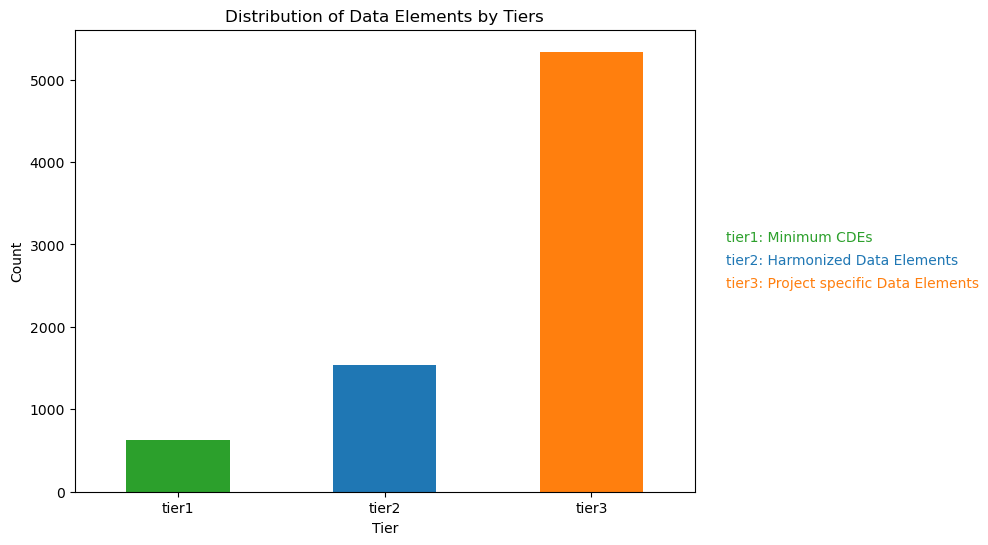

In [10]:
#
# Distribution of Data Elements by Tiers
tier_counts = df['tier'].value_counts()
tier_counts.sort_values(inplace=True)
plt.figure(figsize=(8, 6))
tier_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Data Elements by Tiers')
plt.xlabel('Tier')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add descriptive text to the right of the chart
# description = "tier1: Minimum CDEs\ntier2: Harmonized Data Elements\ntier3: Non-harmonized Data Elements"
# plt.text(1.05, 0.5, description, transform=plt.gca().transAxes, ha="left", va="center", fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Place each line of descriptive text with matching colors for each tier
plt.text(1.05, 0.55, "tier1: Minimum CDEs", transform=plt.gca().transAxes, ha="left", va="center", fontsize=10, color=colors[0])
plt.text(1.05, 0.5, "tier2: Harmonized Data Elements", transform=plt.gca().transAxes, ha="left", va="center", fontsize=10, color=colors[1])
plt.text(1.05, 0.45, "tier3: Project specific Data Elements", transform=plt.gca().transAxes, ha="left", va="center", fontsize=10, color=colors[2])

plt.show()

## Distribution of Data Elements by Tier and Subproject

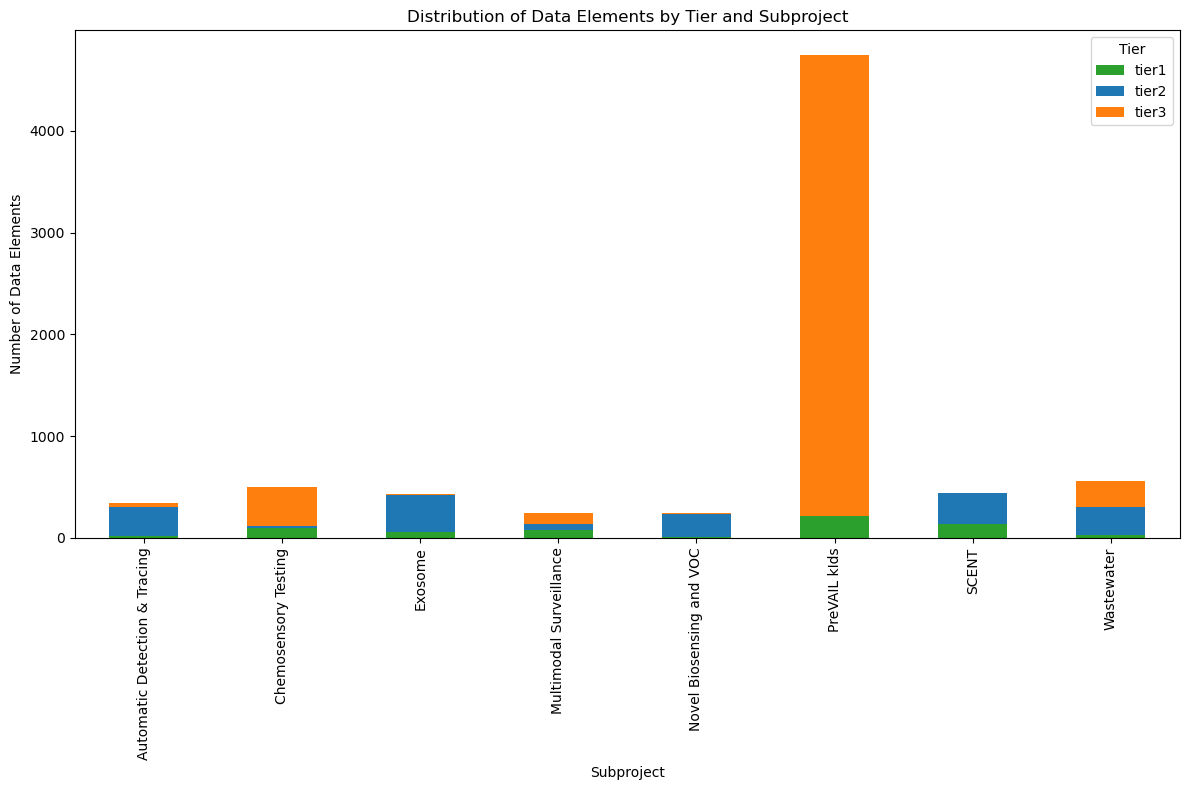

In [11]:
#
# Distribution of Data Elements by Tier and Subproject
tier_subproject_counts = df.groupby(['tier', 'subproject']).size().unstack().fillna(0)

tier_subproject_counts.T.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Distribution of Data Elements by Tier and Subproject')
plt.xlabel('Subproject')
plt.ylabel('Number of Data Elements')
plt.legend(title='Tier')
plt.tight_layout()
plt.show()

In [12]:
# Wrap subproject labels after next space if >10 chars)
def wrap_label(label, limit=10):
    """Wrap subproject label into two lines if longer than limit."""
    if len(label) <= limit:
        return label
    # Find the first whitespace *after* the limit
    for i in range(limit, len(label)):
        if label[i].isspace():
            return label[:i] + '\n' + label[i+1:]
    return label

## Distribution of Tier 1 Data Elements by Section

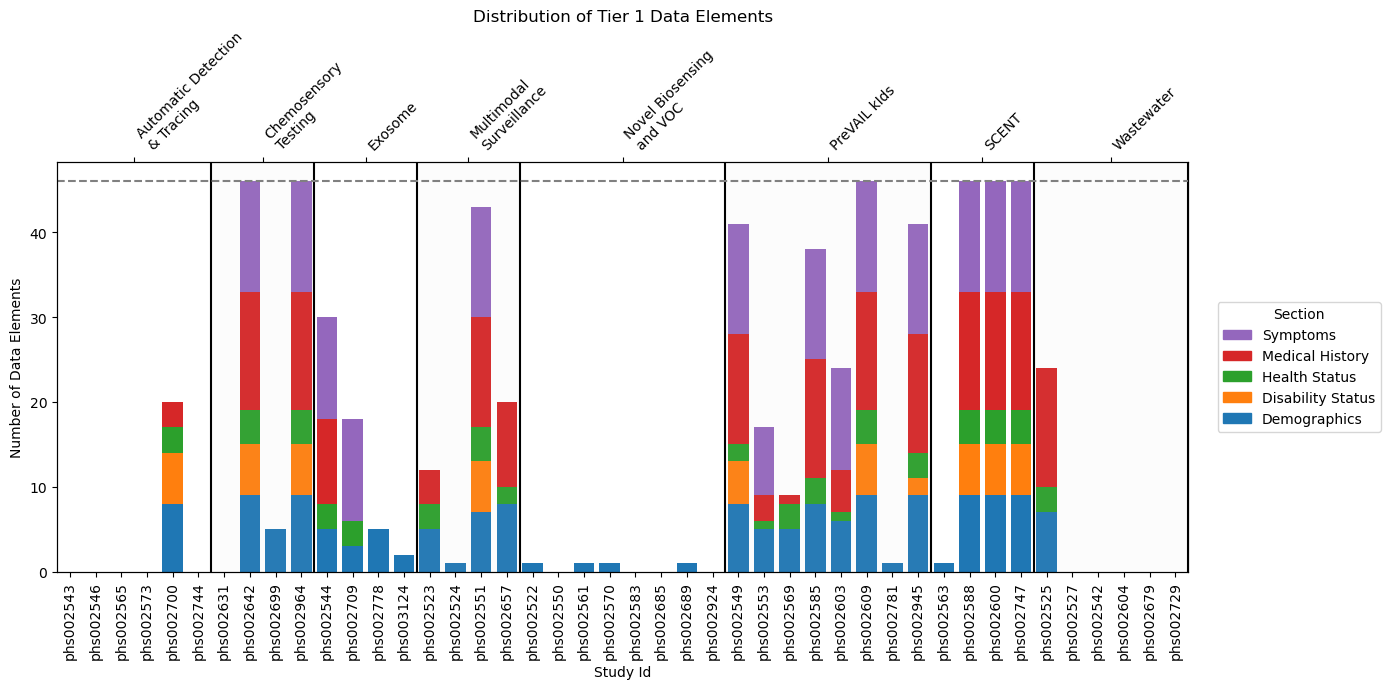

In [13]:
# Build list of all studies (so we can include ones with zero Section‐rows)
all_studies = df[['subproject', 'phs_id']].drop_duplicates()

# Pivot on Section to count how many CDEs of each Section each study has
raw_sec = (
    df
      .pivot_table(
        index=['subproject','phs_id'],
        columns='Section',
        aggfunc='size',
        fill_value=0
      )
      .reset_index()
)

# Left-merge so that studies with no Section data still appear
section_counts = (
    all_studies
      .merge(raw_sec, on=['subproject','phs_id'], how='left')
      .fillna(0)
)

# Identify your Section names and cast them to int
sections = [c for c in section_counts.columns if c not in ('subproject','phs_id')]
section_counts[sections] = section_counts[sections].astype(int)

# Sort by subproject then phs_id
section_counts = section_counts.sort_values(['subproject','phs_id']).reset_index(drop=True)

# Prepare plotting
subprojects = section_counts['subproject'].unique()
section_color_map = {
    sections[0]: 'tab:blue',
    sections[1]: 'tab:orange',
    sections[2]: 'tab:green',
    sections[3]: 'tab:red',
    sections[4]: 'tab:purple',
}

# fig, ax = plt.subplots(figsize=(12,6))
fig, ax = plt.subplots(figsize=(14,7))
ax2 = ax.twiny()

positions = []
sp_tick_pos = []
cur_x = 0

# Draw the stacked bars
for i, sp in enumerate(subprojects):
    block = section_counts[section_counts['subproject']==sp]
    start_x = cur_x
    sp_tick_pos.append(start_x + (len(block)-1)/2)

    for _, row in block.iterrows():
        bottom = 0
        for sec in sections:
            cnt = row[sec]
            ax.bar(
                cur_x,
                cnt,
                bottom=bottom,
                color=section_color_map[sec]
            )
            bottom += cnt
        positions.append(cur_x)
        cur_x += 1

    # shading & divider
    if i % 2 == 1:
        ax.axvspan(start_x-0.5, cur_x-0.5, facecolor='lightgray', alpha=0.05)
    ax.axvline(cur_x-0.5, color='black')

# Labels & ticks
ax.set_xlabel('Study Id')
ax.set_ylabel('Number of Data Elements')
ax.set_title('Distribution of Tier 1 Data Elements')

ax.set_xticks(positions)
ax.set_xticklabels(section_counts['phs_id'], rotation=90)
ax.set_xlim(min(positions)-0.5, max(positions)+0.5)

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(sp_tick_pos)
# ax2.set_xticklabels(subprojects, rotation=45, ha='left')
ax2.set_xticklabels([wrap_label(sp) for sp in subprojects],
                    rotation=45, ha='left')

# Threshold line (max number of minimum CDEs for RADx-rad)
ax.axhline(y=46, color='gray', linestyle='--')

# Legend
patches = [
    mpatches.Patch(color=section_color_map[sec], label=sec)
    for sec in reversed(sections)
]
ax.legend(
    handles=patches,
    title='Section',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5)
)

plt.tight_layout()
plt.show()

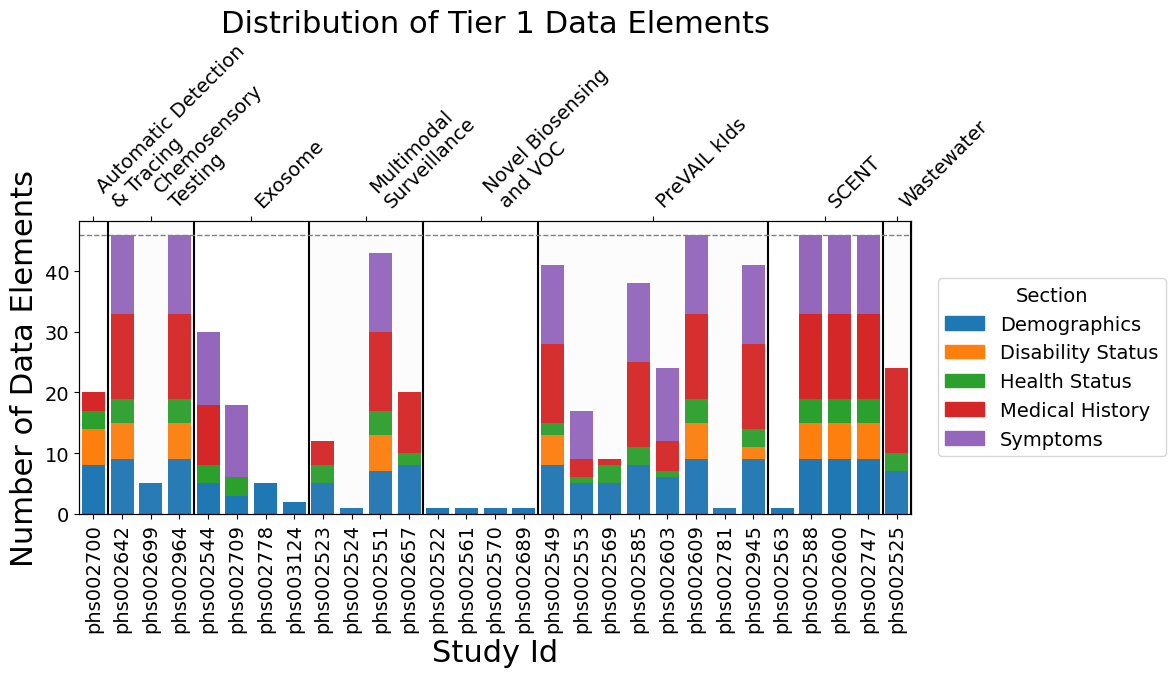

In [14]:
# Pivot on Section
section_counts = (
    df
    .pivot_table(
        index=['subproject', 'phs_id'],
        columns='Section',
        aggfunc='size',
        fill_value=0
    )
    .sort_index(level='subproject')
    .reset_index()
)

# Prepare for plotting
filtered = section_counts.copy()
subprojects = filtered['subproject'].unique()
# All section names (the five categories)
sections = [c for c in filtered.columns if c not in ('subproject', 'phs_id')]

# Define color map for each Section
section_color_map = {
    sections[0]: 'tab:blue',
    sections[1]: 'tab:orange',
    sections[2]: 'tab:green',
    sections[3]: 'tab:red',
    sections[4]: 'tab:purple',
}

# Set default font globally
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 14  # default for all text elements

# Create figure and axes
#fig, ax = plt.subplots(figsize=(12, 6))
fig, ax = plt.subplots(figsize=(12, 7))
ax2 = ax.twiny()

positions = []
subproject_tick_pos = []
current_x = 0

# Draw stacked bars by subproject and phs_id
for i, sp in enumerate(subprojects):
    block = filtered[filtered['subproject'] == sp]
    start_x = current_x
    # center the subproject label
    subproject_tick_pos.append(start_x + (len(block) - 1) / 2)

    for _, row in block.iterrows():
        bottom = 0
        for sec in sections:
            count = row.get(sec, 0)
            ax.bar(
                current_x,
                count,
                bottom=bottom,
                color=section_color_map[sec]
            )
            bottom += count
        positions.append(current_x)
        current_x += 1

    # alternate background shading
    if i % 2 == 1:
        ax.axvspan(start_x - 0.5, current_x - 0.5, facecolor='lightgray', alpha=0.05)
    # divider line
    ax.axvline(current_x - 0.5, color='black', linestyle='-')

# Axis labels and title
ax.set_xlabel('Study Id', fontsize=22, fontfamily='DejaVu Sans')
ax.set_ylabel('Number of Data Elements', fontsize=22, fontfamily='DejaVu Sans')
ax.set_title('Distribution of Tier 1 Data Elements', fontsize=22, fontfamily='DejaVu Sans')

# X-tick labels for phs_id
ax.set_xticks(positions)
ax.set_xticklabels(filtered['phs_id'], rotation=90)
ax.set_xlim(min(positions) - 0.5, max(positions) + 0.5)

# Top axis for subproject labels
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(subproject_tick_pos)
#ax2.set_xticklabels(subprojects, rotation=45, ha='left')
ax2.set_xticklabels([wrap_label(sp) for sp in subprojects],
                    rotation=45, ha='left')

# Optional threshold line
ax.axhline(y=46, color='gray', linestyle='--', linewidth=1)

# Custom legend on the right showing all Sections
patches = [
    mpatches.Patch(color=section_color_map[sec], label=sec)
    for sec in sections
]
ax.legend(
    handles=patches,
    title="Section",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5)
)

plt.tight_layout()
plt.show()

## Distribution of Tier1 Data Elements (Minimum CDEs)
The dashed line indicates the maximum number of CDEs (46).

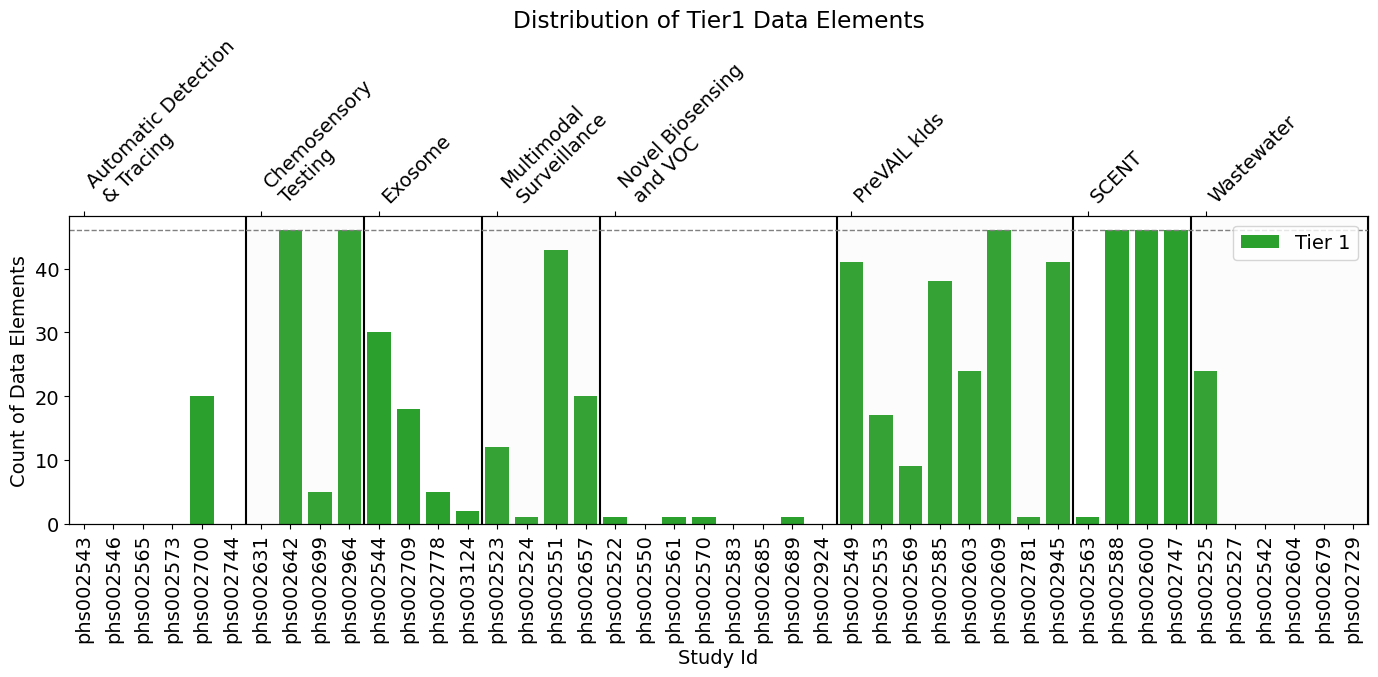

In [15]:
#
# Distribution of Tier1 Data Elements (Minimum CDEs)
tier_counts = df.pivot_table(index=['subproject', 'phs_id'], columns='tier', aggfunc='size', fill_value=0)

# Sort the radx_ids by subproject
tier_counts = tier_counts.sort_index(level='subproject')

# Reset the index for easier plotting
tier_counts = tier_counts.reset_index()

filtered_tier_counts = tier_counts

# Get the updated list of subprojects after filtering
filtered_subprojects = filtered_tier_counts['subproject'].unique()

# Set default font globally
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 14  # default for all text elements

# Set up the figure and axes again
# fig, ax = plt.subplots(figsize=(12, 6))
fig, ax = plt.subplots(figsize=(14, 7))

# Create a second axis at the top for subproject labels
ax2 = ax.twiny()

# Clear the positions tracking for radx_ids
positions = []
current_pos = 0
subproject_positions = []

# Iterate over filtered subprojects and plot bars for each radx_id
for i, subproject in enumerate(filtered_subprojects):
    subproject_data = filtered_tier_counts[filtered_tier_counts['subproject'] == subproject]
    
    start_pos = current_pos  # Track the start position for the current subproject
    subproject_positions.append((start_pos + current_pos) / 2)  # Position for the subproject label
    
    for idx, row in subproject_data.iterrows():
        # radx_id = row['radx_id']
        radx_id = row['phs_id']
        tier1_count = row.get('tier1', 0)
        
        # Stack the bars for tier1, tier2, tier3 with updated colors
        ax.bar(current_pos, tier1_count, color=tier_color_map['tier1'], label='Tier 1' if current_pos == 0 else "")
        
        # Keep track of position
        positions.append(current_pos)
        current_pos += 1
    
    # Add transparent gray shading for every second subproject
    if i % 2 == 1:
        ax.axvspan(start_pos - 0.5, current_pos - 0.5, facecolor='lightgray', alpha=0.05)
    
    # Add a vertical line to separate subprojects
    ax.axvline(current_pos - 0.5, color='black', linestyle='-')

# Customize the main chart
ax.set_xlabel('Study Id')
ax.set_ylabel('Count of Data Elements')
ax.set_title('Distribution of Tier1 Data Elements')
ax.set_xticks(positions)
# ax.set_xticklabels(filtered_tier_counts['radx_id'], rotation=90)
ax.set_xticklabels(filtered_tier_counts['phs_id'], rotation=90)

# Remove extra space by setting x-axis limits
ax.set_xlim(min(positions) - 0.5, max(positions) + 0.5)

# Update the top axis to show subproject labels
ax2.set_xlim(ax.get_xlim())  # Align the two axes
ax2.set_xticks(subproject_positions)
# ax2.set_xticklabels(filtered_subprojects, rotation=45, ha='left')
ax2.set_xticklabels([wrap_label(sp) for sp in subprojects],
                    rotation=45, ha='left')

# Update the legend to show only once
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

# Add a horizontal dashed line at count = 46
ax.axhline(y=46, color='gray', linestyle='--', linewidth=1)

# Show the updated plot
plt.tight_layout()
plt.show()

## Distribution of Data Elements Tiers for Diagnostic Method and Wastewater Projects

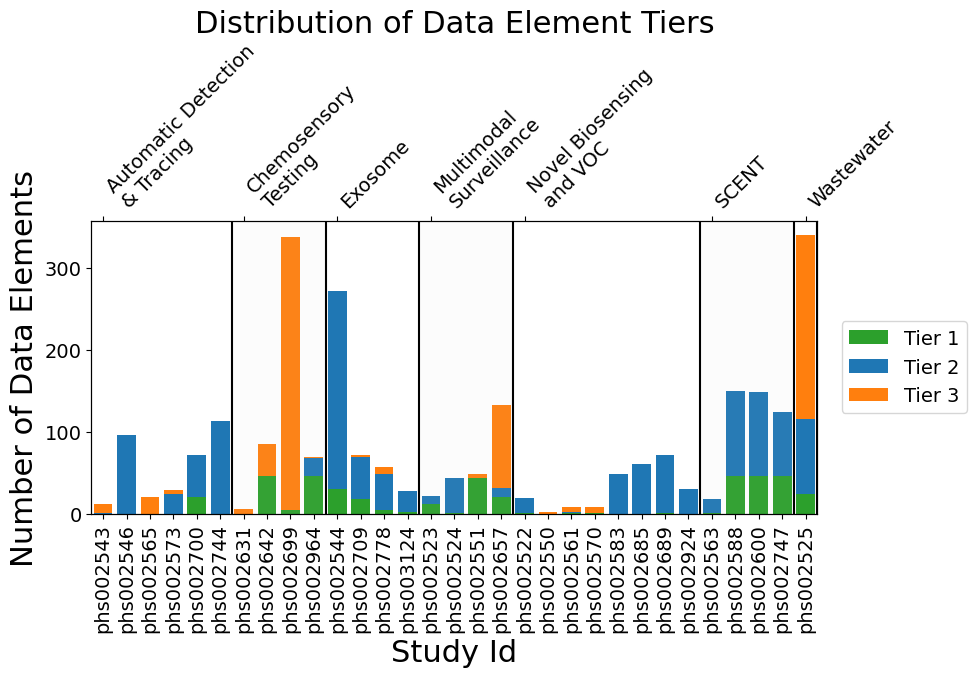

In [16]:
#
# Distribution of Data Elements Tiers for Diagnostic Method and Wastewater Projects
tier_counts = df.pivot_table(index=['subproject', 'phs_id'], columns='tier', aggfunc='size', fill_value=0)

# Sort the radx_ids by subproject
tier_counts = tier_counts.sort_index(level='subproject')

# Reset the index for easier plotting
tier_counts = tier_counts.reset_index()
# Exclude the specified subprojects: "PreVAIL kIds" and "Wastewater"
# filtered_tier_counts = tier_counts[~tier_counts['subproject'].isin(['PreVAIL kIds', 'Wastewater'])]
filtered_tier_counts = tier_counts[~tier_counts['subproject'].isin(['PreVAIL kIds'])]
# Exclude studies without
filtered_tier_counts = filtered_tier_counts[~filtered_tier_counts['phs_id'].isin(['phs002527', 'phs002542', 'phs002604', 'phs002679', 'phs002729'])]

# Get the updated list of subprojects after filtering
filtered_subprojects = filtered_tier_counts['subproject'].unique()

# Set default font globally
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 14  # default for all text elements

# Set up the figure and axes again
#fig, ax = plt.subplots(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 7))

# Create a second axis at the top for subproject labels
ax2 = ax.twiny()

# Clear the positions tracking for radx_ids
positions = []
current_pos = 0
subproject_positions = []

# Iterate over filtered subprojects and plot bars for each radx_id
for i, subproject in enumerate(filtered_subprojects):
    subproject_data = filtered_tier_counts[filtered_tier_counts['subproject'] == subproject]

    start_pos = current_pos  # Track the start position for the current subproject
    subproject_positions.append((start_pos + current_pos) / 2)  # Position for the subproject label

    for idx, row in subproject_data.iterrows():
        radx_id = row['phs_id']
        # radx_id = row['radx_id']
        tier1_count = row.get('tier1', 0)
        tier2_count = row.get('tier2', 0)
        tier3_count = row.get('tier3', 0)

        # Stack the bars for tier1, tier2, tier3 with updated colors
        ax.bar(current_pos, tier1_count, color=tier_color_map['tier1'], label='Tier 1' if current_pos == 0 else "")
        ax.bar(current_pos, tier2_count, bottom=tier1_count, color=tier_color_map['tier2'], label='Tier 2' if current_pos == 0 else "")
        ax.bar(current_pos, tier3_count, bottom=tier1_count + tier2_count, color=tier_color_map['tier3'], label='Tier 3' if current_pos == 0 else "")

        # Keep track of position
        positions.append(current_pos)
        current_pos += 1

    # Add transparent gray shading for every second subproject
    if i % 2 == 1:
        ax.axvspan(start_pos - 0.5, current_pos - 0.5, facecolor='lightgray', alpha=0.05)

    # Add a vertical line to separate subprojects
    ax.axvline(current_pos - 0.5, color='black', linestyle='-')

# Customize the main chart
ax.set_xlabel('Study Id', fontsize=22, fontfamily='DejaVu Sans')
ax.set_ylabel('Number of Data Elements', fontsize=22, fontfamily='DejaVu Sans')
ax.set_title('Distribution of Data Element Tiers', fontsize=22, fontfamily='DejaVu Sans')
ax.set_xticks(positions)
ax.set_xticklabels(filtered_tier_counts['phs_id'], rotation=90)

# Remove extra space by setting x-axis limits
ax.set_xlim(min(positions) - 0.5, max(positions) + 0.5)

# Update the top axis to show subproject labels
ax2.set_xlim(ax.get_xlim())  # Align the two axes
ax2.set_xticks(subproject_positions)
# ax2.set_xticklabels(filtered_subprojects, rotation=45, ha='left')
ax2.set_xticklabels([wrap_label(sp) for sp in filtered_subprojects],
                    rotation=45, ha='left')

# Update the legend to show only once
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# ax.legend(by_label.values(), by_label.keys(), loc='upper right')

ax.legend(by_label.values(), by_label.keys(), loc="center left", bbox_to_anchor=(1.02, 0.5))

# Show the updated plot
plt.tight_layout()
plt.show()